In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
final_df = pd.read_csv('./final_data/rolled_data.csv')

In [5]:
data_shape = final_df.shape
print(data_shape)

(19583, 142)


In [4]:
final_df = final_df.dropna()

In [108]:
class_distribution = final_df['tactic'].value_counts()
print(class_distribution)

tactic
4231 - Contraataque      3427
4231 - Posesion          2718
433 - Posesion           2153
343 - Presion Alta       1860
442 - Posesion           1450
442 - Juego Directo      1330
4141 - Posesion          1275
433 - Juego Directo      1220
352 - Posesion           1204
352 - Presion Alta       1164
41212 - Juego Directo    1035
532 - Contraataque        747
Name: count, dtype: int64


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [7]:
X = final_df.drop(['tactic','datetime'], axis=1)
y = final_df['tactic']

# Encoding de tactic
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
# División en train y test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [12]:
num_classes = len(label_encoder.classes_)

In [12]:
# Construcción del modelo
dense = Sequential()
dense.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(Dense(32, activation='relu'))
dense.add(Dense(32, activation='relu'))
dense.add(Dense(num_classes, activation='softmax'))  # Capa de salida

# Compilación del modelo
dense.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Entrenamiento del modelo
nn = dense.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
490/490 [==============================] - 3s 5ms/step - loss: 2.3838 - accuracy: 0.1773 - val_loss: 2.3542 - val_accuracy: 0.1930
Epoch 2/50
490/490 [==============================] - 0s 587us/step - loss: 2.3468 - accuracy: 0.1970 - val_loss: 2.3476 - val_accuracy: 0.1961
Epoch 3/50
490/490 [==============================] - 0s 583us/step - loss: 2.3348 - accuracy: 0.1976 - val_loss: 2.3377 - val_accuracy: 0.2004
Epoch 4/50
490/490 [==============================] - 0s 582us/step - loss: 2.3278 - accuracy: 0.1994 - val_loss: 2.3357 - val_accuracy: 0.1915
Epoch 5/50
490/490 [==============================] - 0s 581us/step - loss: 2.3234 - accuracy: 0.2021 - val_loss: 2.3344 - val_accuracy: 0.2009
Epoch 6/50
490/490 [==============================] - 0s 583us/step - loss: 2.3217 - accuracy: 0.2026 - val_loss: 2.3334 - val_accuracy: 0.2030
Epoch 7/50
490/490 [==============================] - 0s 614us/step - loss: 2.3165 - accuracy: 0.2057 - val_loss: 2.3317 - val_accuracy: 0

In [14]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = dense.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

123/123 [==============================] - 0s 385us/step - loss: 2.4120 - accuracy: 0.1716
Test Loss: 2.411964178085327, Test Accuracy: 0.1715598702430725


In [15]:
# Evaluación del modelo en el conjunto de prueba
y_pred_dense = dense.predict(X_test)
y_pred_classes = np.argmax(y_pred_dense, axis=1)

# Informe de clasificación
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

                       precision    recall  f1-score   support

   343 - Presion Alta       0.14      0.15      0.15       375
       352 - Posesion       0.11      0.11      0.11       235
   352 - Presion Alta       0.12      0.04      0.06       234
41212 - Juego Directo       0.05      0.00      0.01       219
      4141 - Posesion       0.06      0.01      0.01       261
  4231 - Contraataque       0.21      0.60      0.31       672
      4231 - Posesion       0.17      0.24      0.20       538
  433 - Juego Directo       0.07      0.01      0.02       237
       433 - Posesion       0.09      0.04      0.06       430
  442 - Juego Directo       0.11      0.02      0.03       283
       442 - Posesion       0.11      0.07      0.08       290
   532 - Contraataque       0.06      0.01      0.01       143

             accuracy                           0.17      3917
            macro avg       0.11      0.11      0.09      3917
         weighted avg       0.13      0.17      0.12 

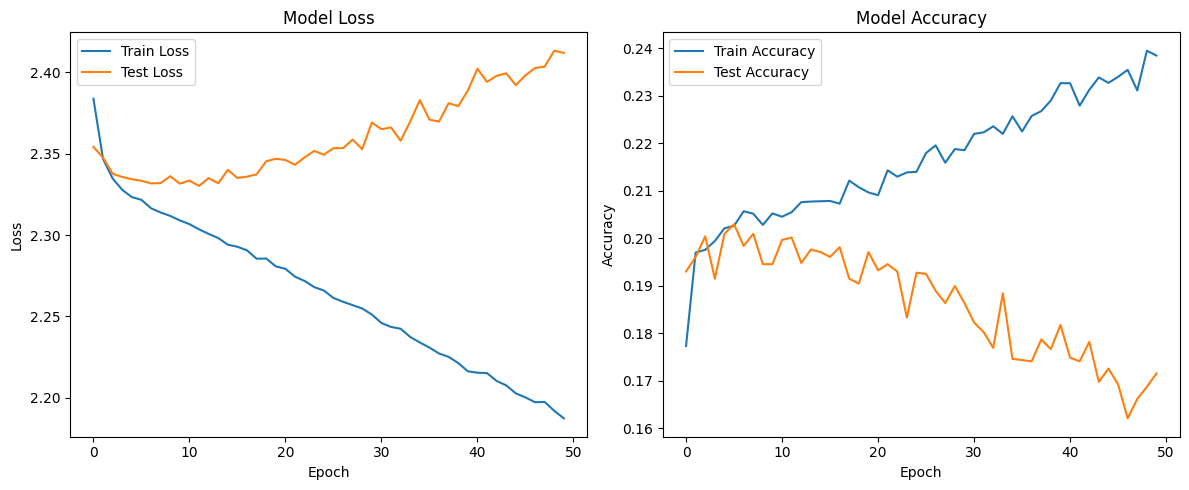

In [29]:
# Gráficas de loss y accuracy
plt.figure(figsize=(12, 5))

# Gráfica de loss
plt.subplot(1, 2, 1)
plt.plot(nn.history['loss'], label='Train Loss')
plt.plot(nn.history['val_loss'], label='Test Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')

# Gráfica de accuracy
plt.subplot(1, 2, 2)
plt.plot(nn.history['accuracy'], label='Train Accuracy')
plt.plot(nn.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
y_pred_dense = np.argmax(y_pred_dense, axis=1)

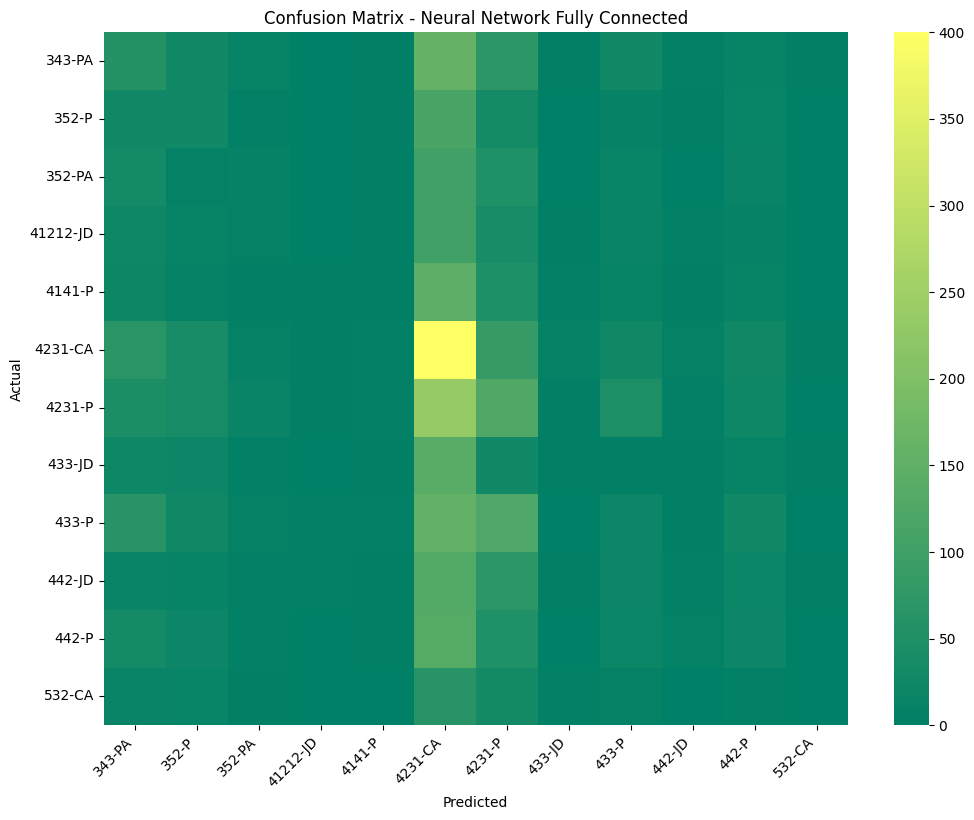

In [21]:
conf_matrix_dense = confusion_matrix(y_test, y_pred_dense)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_dense, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network Fully Connected')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [9]:
n_steps = 5
n_features = X_train.shape[1] // n_steps

In [10]:
# Reestructuración de los datos
X_train_lstm = np.zeros((X_train.shape[0], n_steps, n_features))
X_test_lstm = np.zeros((X_test.shape[0], n_steps, n_features))

for i in range(n_steps):
    step_columns = [col for col in X.columns if f'_{i+1}' in col]
    X_train_lstm[:, i, :] = X_train[step_columns].values
    X_test_lstm[:, i, :] = X_test[step_columns].values

# Convertir las etiquetas a categoricas
y_train_cat = to_categorical(y_train, num_classes=12)
y_test_cat = to_categorical(y_test, num_classes=12)

In [19]:
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(n_steps, n_features)))
lstm.add(LSTM(50, return_sequences=False))
lstm.add(Dense(25, activation='relu'))
lstm.add(Dense(num_classes, activation='softmax'))

In [20]:
# Compilación del modelo
lstm.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
nn2 = lstm.fit(X_train_lstm, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_cat))


Epoch 1/50
490/490 [==============================] - 3s 3ms/step - loss: 2.3773 - accuracy: 0.1770 - val_loss: 2.3553 - val_accuracy: 0.1762
Epoch 2/50
490/490 [==============================] - 1s 3ms/step - loss: 2.3431 - accuracy: 0.1941 - val_loss: 2.3390 - val_accuracy: 0.1940
Epoch 3/50
490/490 [==============================] - 1s 3ms/step - loss: 2.3350 - accuracy: 0.1962 - val_loss: 2.3389 - val_accuracy: 0.1938
Epoch 4/50
490/490 [==============================] - 1s 3ms/step - loss: 2.3316 - accuracy: 0.1984 - val_loss: 2.3352 - val_accuracy: 0.1927
Epoch 5/50
490/490 [==============================] - 1s 3ms/step - loss: 2.3292 - accuracy: 0.1992 - val_loss: 2.3306 - val_accuracy: 0.1963
Epoch 6/50
490/490 [==============================] - 1s 3ms/step - loss: 2.3264 - accuracy: 0.2013 - val_loss: 2.3288 - val_accuracy: 0.1979
Epoch 7/50
490/490 [==============================] - 1s 3ms/step - loss: 2.3254 - accuracy: 0.2002 - val_loss: 2.3282 - val_accuracy: 0.1981
Epoch 

In [21]:
# Evaluar el modelo en el test set
test_loss, test_accuracy = lstm.evaluate(X_test_lstm, y_test_cat)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

123/123 [==============================] - 0s 869us/step - loss: 2.4187 - accuracy: 0.1769
Test Loss: 2.418717384338379, Test Accuracy: 0.17692111432552338


In [27]:
# Hacer predicciones
y_pred_lstm = lstm.predict(X_test_lstm)

# Convertir las predicciones de probabilidades a etiquetas
y_pred_classes = np.argmax(y_pred_lstm, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Generar el reporte de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print(report)

                       precision    recall  f1-score   support

   343 - Presion Alta       0.13      0.09      0.10       375
       352 - Posesion       0.10      0.08      0.09       235
   352 - Presion Alta       0.09      0.03      0.05       234
41212 - Juego Directo       0.06      0.01      0.02       219
      4141 - Posesion       0.07      0.02      0.03       261
  4231 - Contraataque       0.20      0.54      0.29       672
      4231 - Posesion       0.20      0.35      0.26       538
  433 - Juego Directo       0.00      0.00      0.00       237
       433 - Posesion       0.10      0.07      0.09       430
  442 - Juego Directo       0.06      0.01      0.02       283
       442 - Posesion       0.12      0.04      0.07       290
   532 - Contraataque       0.10      0.01      0.01       143

             accuracy                           0.17      3917
            macro avg       0.10      0.11      0.09      3917
         weighted avg       0.12      0.17      0.12 

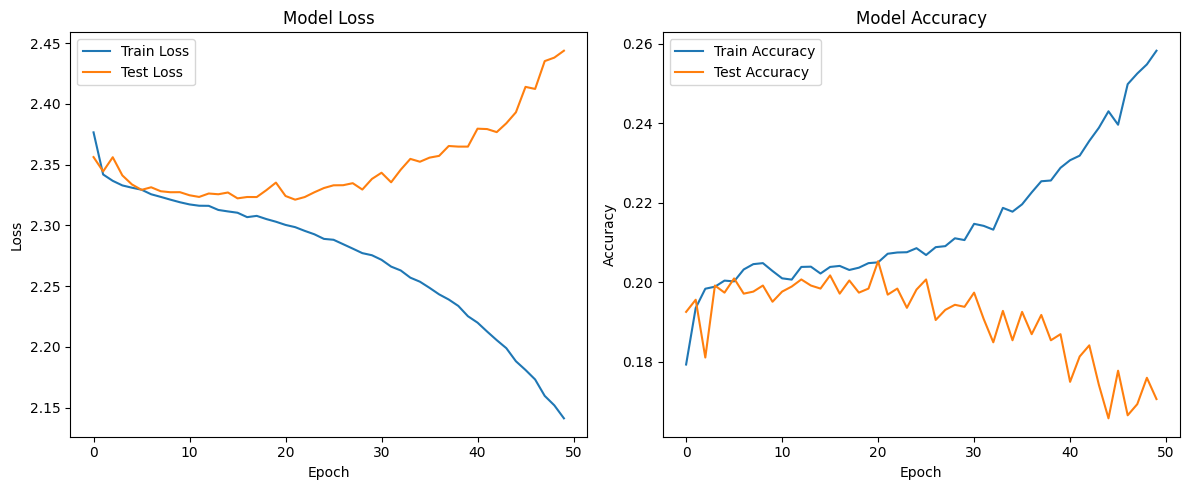

In [28]:
# Gráficas de loss y accuracy
plt.figure(figsize=(12, 5))

# Gráfica de loss
plt.subplot(1, 2, 1)
plt.plot(nn2.history['loss'], label='Train Loss')
plt.plot(nn2.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Gráfica de accuracy
plt.subplot(1, 2, 2)
plt.plot(nn2.history['accuracy'], label='Train Accuracy')
plt.plot(nn2.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [30]:
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

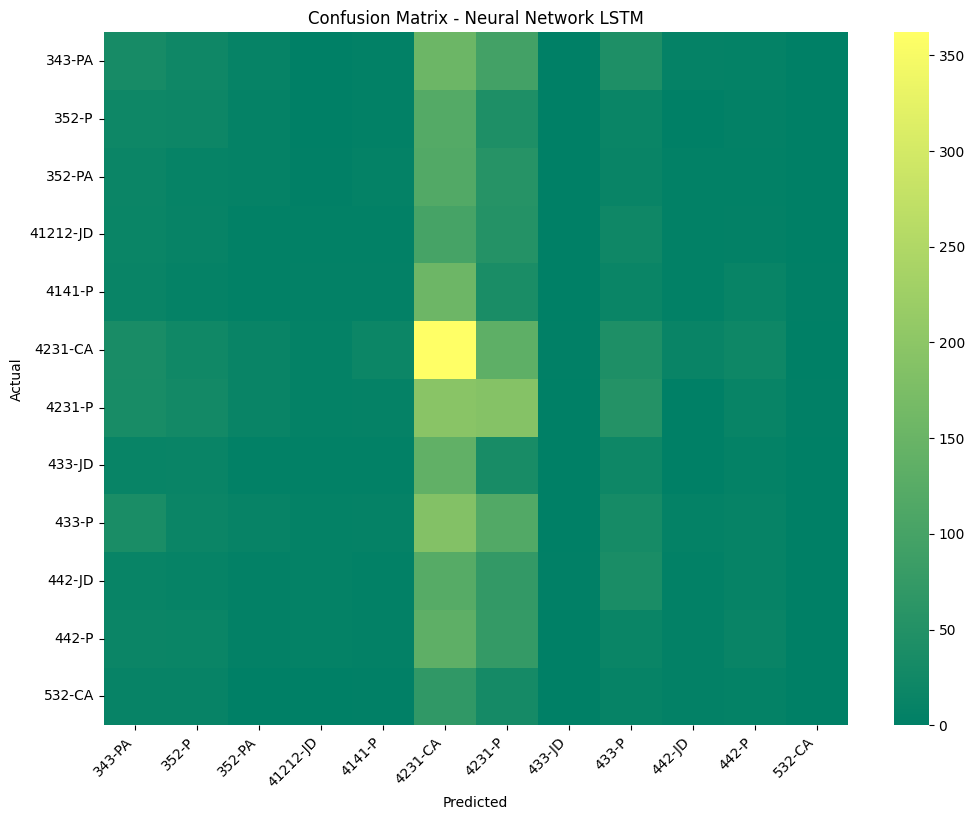

In [31]:
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

# Nombres de clases abreviados
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_lstm, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network LSTM')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dropout

In [33]:
n_features_per_match = len([col for col in final_df.columns if '_1' in col])

# Reestructuración de los datos
X_train_cnn = np.zeros((X_train.shape[0], n_features_per_match, 5))
X_test_cnn = np.zeros((X_test.shape[0], n_features_per_match, 5))

for i in range(5):
    step_columns = [col for col in X.columns if f'_{i+1}' in col]
    X_train_cnn[:, :, i] = X_train[step_columns].values
    X_test_cnn[:, :, i] = X_test[step_columns].values


In [34]:
# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)    

# Convertir las etiquetas a categoricas
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

num_classes = y_train_cat.shape[1]

In [35]:
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_features_per_match, 5)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
nn3 = cnn.fit(X_train_cnn, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test_cat))

Epoch 1/50
490/490 [==============================] - 1s 2ms/step - loss: 2.3633 - accuracy: 0.1851 - val_loss: 2.3499 - val_accuracy: 0.1866
Epoch 2/50
490/490 [==============================] - 1s 2ms/step - loss: 2.3348 - accuracy: 0.1956 - val_loss: 2.3423 - val_accuracy: 0.1922
Epoch 3/50
490/490 [==============================] - 1s 2ms/step - loss: 2.3237 - accuracy: 0.2016 - val_loss: 2.3337 - val_accuracy: 0.1950
Epoch 4/50
490/490 [==============================] - 1s 1ms/step - loss: 2.3155 - accuracy: 0.2062 - val_loss: 2.3327 - val_accuracy: 0.1966
Epoch 5/50
490/490 [==============================] - 1s 1ms/step - loss: 2.3079 - accuracy: 0.2027 - val_loss: 2.3362 - val_accuracy: 0.1981
Epoch 6/50
490/490 [==============================] - 1s 1ms/step - loss: 2.3004 - accuracy: 0.2068 - val_loss: 2.3360 - val_accuracy: 0.1938
Epoch 7/50
490/490 [==============================] - 1s 1ms/step - loss: 2.2922 - accuracy: 0.2121 - val_loss: 2.3396 - val_accuracy: 0.1973
Epoch 

In [36]:
# Evaluar el modelo en el test set
test_loss, test_accuracy = cnn.evaluate(X_test_cnn, y_test_cat)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

  1/123 [..............................] - ETA: 1s - loss: 3.0826 - accuracy: 0.0938

123/123 [==============================] - 0s 734us/step - loss: 2.8178 - accuracy: 0.1389
Test Loss: 2.8177905082702637, Test Accuracy: 0.13888180255889893


In [37]:
# Hacer predicciones
y_pred_cnn = cnn.predict(X_test_cnn)

# Convertir las predicciones de probabilidades a etiquetas
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

target_names = [str(cls) for cls in label_encoder.classes_]

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       375
           1       0.11      0.14      0.13       235
           2       0.07      0.05      0.06       234
           3       0.05      0.02      0.03       219
           4       0.05      0.02      0.03       261
           5       0.23      0.33      0.27       672
           6       0.15      0.21      0.18       538
           7       0.07      0.06      0.06       237
           8       0.13      0.12      0.13       430
           9       0.08      0.06      0.07       283
          10       0.06      0.06      0.06       290
          11       0.12      0.03      0.05       143

    accuracy                           0.14      3917
   macro avg       0.10      0.10      0.10      3917
weighted avg       0.12      0.14      0.13      3917



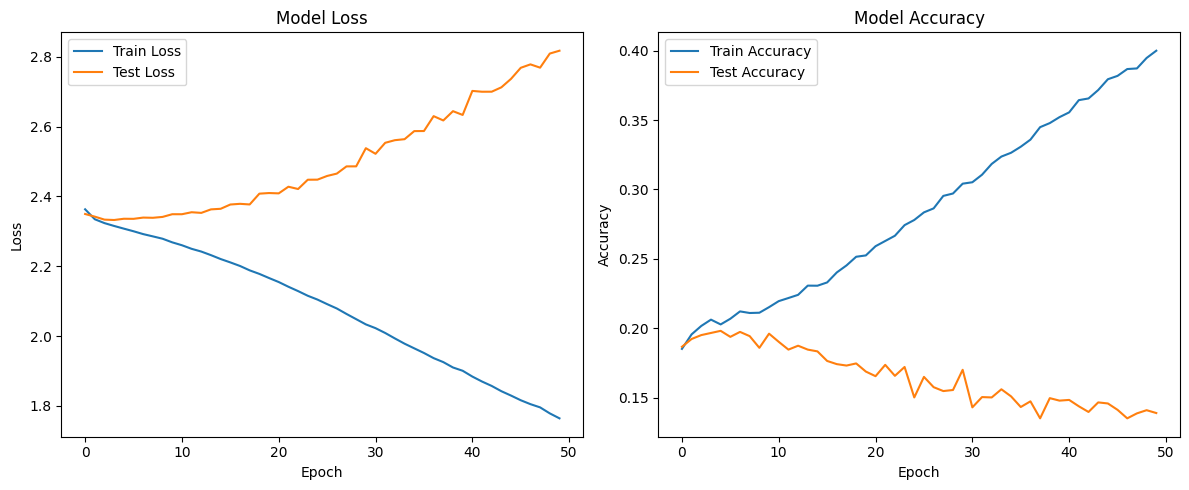

In [38]:
# Gráficas de loss y accuracy
plt.figure(figsize=(12, 5))

# Gráfica de loss
plt.subplot(1, 2, 1)
plt.plot(nn3.history['loss'], label='Train Loss')
plt.plot(nn3.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Gráfica de accuracy
plt.subplot(1, 2, 2)
plt.plot(nn3.history['accuracy'], label='Train Accuracy')
plt.plot(nn3.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [39]:
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

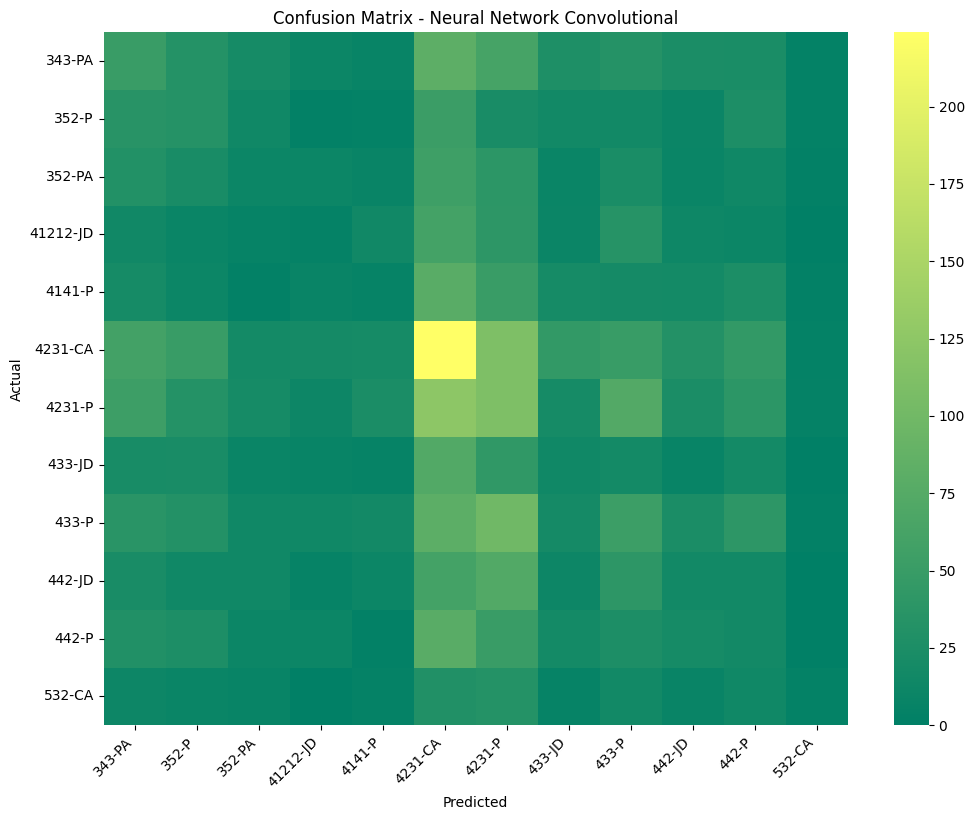

In [40]:
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Nombres de clases abreviados
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_cnn, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network Convolutional')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [79]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 99.8/99.8 MB 8.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import xgboost as xgb

# Convertir los conjuntos de datos en DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Especificar los parámetros del modelo
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': 12,
    'eval_metric': ['mlogloss', 'merror']
}

num_round = 50

# Entrenar el modelo
bst = xgb.train(params, dtrain, num_round)

# Hacer predicciones
preds = bst.predict(dtest)
y_pred_xgb = np.asarray([np.argmax(line) for line in preds])

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 16.34%


In [50]:
dtrain = xgb.DMatrix(X_train, label=y_train)

# Hacer predicciones sobre el train set
train_preds = bst.predict(dtrain)

# Convertir las predicciones de probabilidades a etiquetas
y_train_pred = np.asarray([np.argmax(line) for line in train_preds])


In [47]:
dvalid = xgb.DMatrix(X_test, label=y_test) 

# Lista para almacenar resultados de evaluación
evals_result = {}

bst = xgb.train(params, dtrain, num_round, evals=[(dtrain, 'train'), (dvalid, 'valid')], evals_result=evals_result)

[0]	train-mlogloss:2.37105	train-merror:0.72105	valid-mlogloss:2.43712	valid-merror:0.83201
[1]	train-mlogloss:2.28199	train-merror:0.68026	valid-mlogloss:2.41113	valid-merror:0.82818
[2]	train-mlogloss:2.20739	train-merror:0.65160	valid-mlogloss:2.39484	valid-merror:0.82691
[3]	train-mlogloss:2.14606	train-merror:0.62760	valid-mlogloss:2.38303	valid-merror:0.82333
[4]	train-mlogloss:2.08976	train-merror:0.60858	valid-mlogloss:2.37418	valid-merror:0.82257
[5]	train-mlogloss:2.04197	train-merror:0.59396	valid-mlogloss:2.36930	valid-merror:0.82282
[6]	train-mlogloss:1.99202	train-merror:0.57551	valid-mlogloss:2.36814	valid-merror:0.82282
[7]	train-mlogloss:1.94781	train-merror:0.55694	valid-mlogloss:2.36609	valid-merror:0.82308
[8]	train-mlogloss:1.90339	train-merror:0.53843	valid-mlogloss:2.36474	valid-merror:0.82180
[9]	train-mlogloss:1.86382	train-merror:0.52292	valid-mlogloss:2.36568	valid-merror:0.82359
[10]	train-mlogloss:1.83014	train-merror:0.50555	valid-mlogloss:2.36570	valid-me

In [59]:
y_pred_xgb = np.asarray([np.argmax(line) for line in preds]) 
y_train_pred = np.asarray([np.argmax(line) for line in train_preds]) 

report = classification_report(y_test, y_pred_xgb)
print("Reporte de Clasificación para el Conjunto de Prueba:\n", report)


Reporte de Clasificación para el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.13      0.11      0.12       375
           1       0.12      0.06      0.08       235
           2       0.06      0.02      0.03       234
           3       0.00      0.00      0.00       219
           4       0.08      0.02      0.03       261
           5       0.20      0.47      0.28       672
           6       0.18      0.33      0.23       538
           7       0.10      0.03      0.05       237
           8       0.13      0.13      0.13       430
           9       0.08      0.02      0.03       283
          10       0.09      0.04      0.05       290
          11       0.00      0.00      0.00       143

    accuracy                           0.16      3917
   macro avg       0.10      0.10      0.09      3917
weighted avg       0.12      0.16      0.12      3917



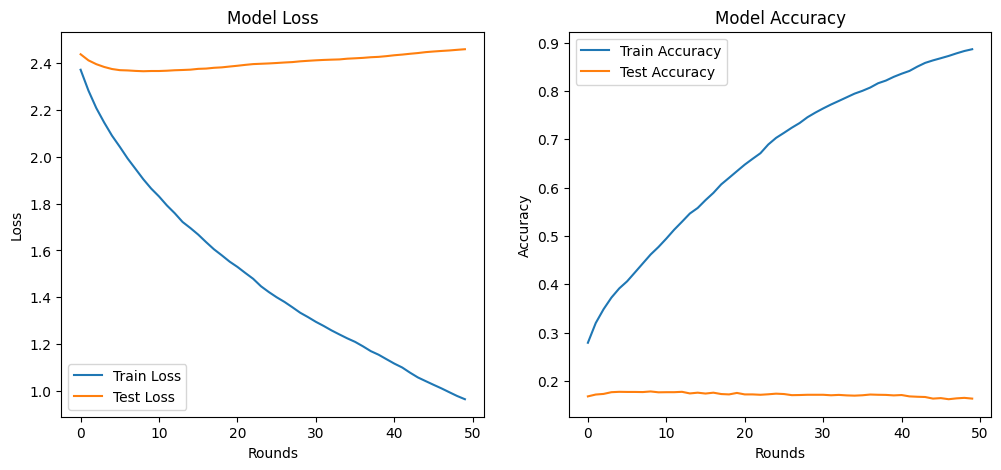

In [60]:
# Extraer métricas de loss y error de los resultados de evaluación
train_loss = evals_result['train']['mlogloss']
valid_loss = evals_result['valid']['mlogloss']
train_error = evals_result['train']['merror']
valid_error = evals_result['valid']['merror']

# Calcular accuracy como 1 - error
train_accuracy = [1 - e for e in train_error]
valid_accuracy = [1 - e for e in valid_error]

# Graficar loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Test Loss')
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.title('Model Loss')

# Graficar error (1 - accuracy)
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(valid_accuracy, label='Test Accuracy')
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.show()

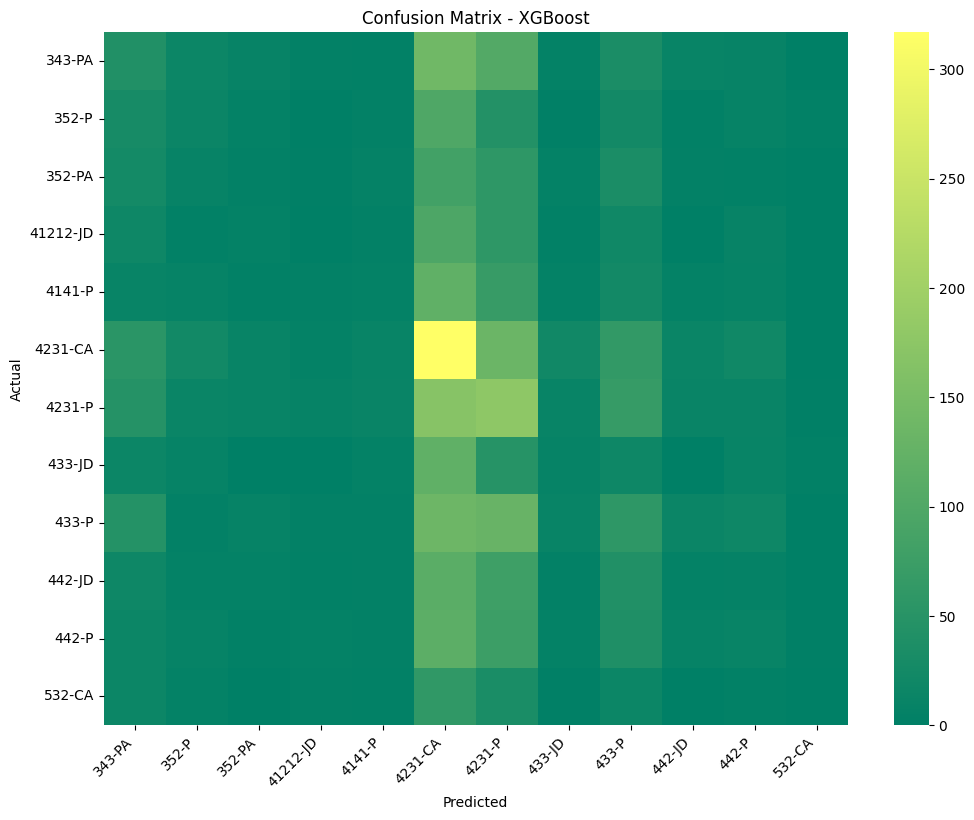

In [62]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_xgb, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()